In [8]:
class Person:
    #initializer (생성자)
    # __이름__() : 매직메소드
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return self.name
    
    #객체를 함수처럼 사용할 수 있도록 하는 매직메소드
    #객체()
    def __call__(self, age):
        print('__call__', self.name, age)
        return age + 50

In [6]:
p = Person('홍길동')
print(p.name)

홍길동


In [9]:
p = Person('이순신')
p(30) #__call__ 매직 메소드 호출

__call__ 이순신 30


80

In [10]:
result = Person('박철우')(50)
result

__call__ 박철우 50


100

# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.


```
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

### Sequential

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [ ]:
출력데이터1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(입력데이터)

In [ ]:
출력데이터2 = layers.MaxPooling2D

In [ ]:
seq_model = keras.Sequential()
seq_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
seq_model.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding='same'))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(units=8, activation='relu'))
seq_model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#seq_model.predict(image_np)

### Functional

In [17]:
#레이어들의 구조를 만든다
input_tensor = layers.Input(shape=(32,32,3)) #input layer는 입력을 지정하지 않는다(model.predict(인풋))

conv_tensor = layers.Conv2D(filters = 16, kernel_size=3, padding='same', activation='relu')(input_tensor)

mp_tensor = layers.MaxPooling2D(padding='same')(conv_tensor)

flatten_tensor = layers.Flatten()(mp_tensor)

d1_tensor = layers.Dense(units=8, activation='relu')(flatten_tensor)

output_tensor = layers.Dense(units=1, activation='sigmoid')(d1_tensor)

#모델을 만들면서 conv, mp, flatten d1 tensor는 우리가 직접 다룰 일이 없음
#모델 정의
fn_model = models.Model(input_tensor, output_tensor) #입력 텐서, 출력 텐서

#모델 컴파일, 모델 학습, 평가ㅡ 추론은 동일

In [18]:
fn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 32776     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,233
Trainable params: 33,233
Non-trainable params: 0
_________________________________________________________

In [24]:
#출력 변수들은 통일, 일반적으로 block단위로 동일한 변수명을 사용
input_tensor = layers.Input(shape=(32,32,3)) 

conv_layer = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
conv_layer.trainable = False

x1 = layers.Conv2D(filters = 16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters = 16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Flatten()(x2)
x3 = layers.Dense(units=8, activation='relu')(x3)

output_tensor = layers.Dense(units=1, activation='sigmoid')(x3)

#모델 정의
fn_model = models.Model(input_tensor, output_tensor)

In [25]:
fn_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 8200

In [26]:
#transfer Learning
from tensorflow.keras.applications import VGG16


In [30]:
conv_base = VGG16(include_top=False)
#conv base를 하나의 layer라고 생각한다
conv_base.trainable = False

In [31]:

input_tensor = layers.Input(shape = (224, 224, 3))
x = conv_base(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
output_tensor = layers.Dense(units=1, activation='sigmoid')(x)

model = models.Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


## 레이어를 합치는 함수
- concatenate(list, axis=-1)
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- add(list), substract(list), multiply(list)
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [66]:
# ResNet의 residual block
input_tensor = layers.Input(shape = (32,32,3))

x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)
# ------ residual block
x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x1)
x2 = layers.BatchNormalization()(x2)

#input_tensor(입력), x2(block의 출력)을 더한다
add_result = layers.add([x, x2])

output_tensor = layers.ReLU()(add_result)

rb_model = models.Model(input_tensor, output_tensor)


In [67]:
rb_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 32, 32, 64)   1792        input_25[0][0]                   
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_32[0][0]                  
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 32, 32, 64)   256         conv2d_33[0][0]                  
____________________________________________________________________________________________

In [ ]:
keras.utils.plot_model(rb_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃입의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [39]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)
X.shape, y.shape

((150, 4), (150,))

In [40]:
# 꽃잎 너비 : y1, 꽃잎 높이 : y2, 꽃 종류 : y3
# X : [꽃받침 너비, 높이]

y1 = X[:,2]
y2 = X[:,3]
y3 = y

X = X[:,[0,1]]
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

In [41]:
#모델 정의 - 입력 : X, 출력 : y1, y2, y3(다중 출력)
input_tensor = layers.Input(shape = (2,))
#hidden
x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)

#출력
output_1 = layers.Dense(units=1, name='petal_width_output')(x) #곷잎의 너비 = 연속형 >> 회귀문제 >> units=1, activation=None
output_2 = layers.Dense(units=1, name='petal_length_output')(x) #꽃잎의 너비 = 연속형 >> 회귀문제
output_3 = layers.Dense(units=3, activation='softmax', name = 'species')(x) #꽃을 종류 = 다중 분류 범주형 >> units = 클래스의개수 , activation = 'softmax'

#o = layers.concatenate([o1, o2, o3])
#layers.Dense(...)(o)

#모델
model = models.Model(input_tensor, [output_1, output_2, output_3]) #input/output이 여러개일 경우 list로 묶어서 전달


In [42]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 16)           48          input_22[0][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 8)            136         dense_12[0][0]                   
__________________________________________________________________________________________________
petal_width_output (Dense)      (None, 1)            9           dense_13[0][0]                   
____________________________________________________________________________________________

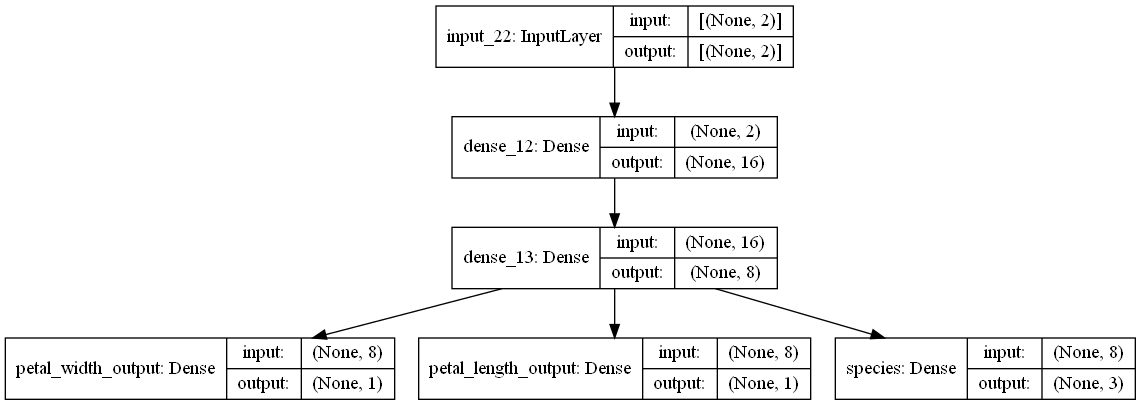

In [43]:
keras.utils.plot_model(model, show_shapes=True)

In [44]:
#컴파일
model.compile(optimizer='adam',
              loss=['mse', 'mse', 'sparse_categorical_crossentropy']) 
#예측결과가 3개에 대한 각각의 loss함수를 순서대로 리스트로 묶어서 전달
#sparse가 왜 붙어있냐 >> y(정답)를  내부적으로 onehotencoding을 처리 후 오차계산을 해준다

In [45]:
# 학습
hist =model.fit(x=X, y=[y1, y2, y3],
                 epochs=100, 
                 validation_split=0.1)

Epoch 1/100
5/5 [==============================] - 6s 104ms/step - loss: 27.9916 - petal_width_output_loss: 24.5220 - petal_length_output_loss: 1.9191 - species_loss: 1.5504 - val_loss: 43.9661 - val_petal_width_output_loss: 40.3625 - val_petal_length_output_loss: 0.1290 - val_species_loss: 3.4746
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 25.8318 - petal_width_output_loss: 22.7344 - petal_length_output_loss: 1.6349 - species_loss: 1.4626 - val_loss: 41.6427 - val_petal_width_output_loss: 38.3492 - val_petal_length_output_loss: 0.0706 - val_species_loss: 3.2229
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 24.2130 - petal_width_output_loss: 21.4494 - petal_length_output_loss: 1.3628 - species_loss: 1.4007 - val_loss: 39.6165 - val_petal_width_output_loss: 36.5932 - val_petal_length_output_loss: 0.0368 - val_species_loss: 2.9865
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 22.8507 - petal_width_output_loss: 

5/5 [==============================] - 0s 10ms/step - loss: 15.1744 - petal_width_output_loss: 13.6377 - petal_length_output_loss: 0.4121 - species_loss: 1.1246 - val_loss: 27.6526 - val_petal_width_output_loss: 25.3309 - val_petal_length_output_loss: 0.6322 - val_species_loss: 1.6896
Epoch 29/100
5/5 [==============================] - 0s 8ms/step - loss: 15.0413 - petal_width_output_loss: 13.5000 - petal_length_output_loss: 0.4167 - species_loss: 1.1246 - val_loss: 27.3881 - val_petal_width_output_loss: 25.1063 - val_petal_length_output_loss: 0.5900 - val_species_loss: 1.6918
Epoch 30/100
5/5 [==============================] - 0s 8ms/step - loss: 14.9106 - petal_width_output_loss: 13.3605 - petal_length_output_loss: 0.4257 - species_loss: 1.1244 - val_loss: 27.1091 - val_petal_width_output_loss: 24.8689 - val_petal_length_output_loss: 0.5464 - val_species_loss: 1.6938
Epoch 31/100
5/5 [==============================] - 0s 8ms/step - loss: 14.7758 - petal_width_output_loss: 13.2148 - p

5/5 [==============================] - 0s 8ms/step - loss: 10.0069 - petal_width_output_loss: 8.1735 - petal_length_output_loss: 0.7166 - species_loss: 1.1168 - val_loss: 17.6537 - val_petal_width_output_loss: 15.8602 - val_petal_length_output_loss: 0.1227 - val_species_loss: 1.6707
Epoch 56/100
5/5 [==============================] - 0s 8ms/step - loss: 9.7420 - petal_width_output_loss: 7.9033 - petal_length_output_loss: 0.7227 - species_loss: 1.1161 - val_loss: 17.0996 - val_petal_width_output_loss: 15.3224 - val_petal_length_output_loss: 0.1173 - val_species_loss: 1.6599
Epoch 57/100
5/5 [==============================] - 0s 9ms/step - loss: 9.4526 - petal_width_output_loss: 7.6056 - petal_length_output_loss: 0.7318 - species_loss: 1.1151 - val_loss: 16.5319 - val_petal_width_output_loss: 14.7708 - val_petal_length_output_loss: 0.1127 - val_species_loss: 1.6484
Epoch 58/100
5/5 [==============================] - 0s 13ms/step - loss: 9.1639 - petal_width_output_loss: 7.3092 - petal_le

Epoch 83/100
5/5 [==============================] - 0s 10ms/step - loss: 4.1022 - petal_width_output_loss: 2.5610 - petal_length_output_loss: 0.4444 - species_loss: 1.0969 - val_loss: 5.0713 - val_petal_width_output_loss: 3.1638 - val_petal_length_output_loss: 0.5725 - val_species_loss: 1.3350
Epoch 84/100
5/5 [==============================] - 0s 12ms/step - loss: 4.0664 - petal_width_output_loss: 2.5346 - petal_length_output_loss: 0.4358 - species_loss: 1.0961 - val_loss: 4.9588 - val_petal_width_output_loss: 3.0263 - val_petal_length_output_loss: 0.6087 - val_species_loss: 1.3238
Epoch 85/100
5/5 [==============================] - 0s 9ms/step - loss: 4.0355 - petal_width_output_loss: 2.5092 - petal_length_output_loss: 0.4301 - species_loss: 1.0962 - val_loss: 4.8307 - val_petal_width_output_loss: 2.8881 - val_petal_length_output_loss: 0.6362 - val_species_loss: 1.3065
Epoch 86/100
5/5 [==============================] - 0s 11ms/step - loss: 4.0100 - petal_width_output_loss: 2.4879 - 

In [48]:
tf.data.Dataset.from_tensor_slices((X, (y1,y2,y3)))

<TensorSliceDataset shapes: ((2,), ((), (), ())), types: (tf.float64, (tf.float64, tf.float64, tf.int32))>

In [50]:
# 추론
import numpy as np
new_data = X[0]
new_data = new_data[np.newaxis, ...]
new_data

array([[5.1, 3.5]])

In [52]:
pred = model.predict(new_data)
pred

[array([[3.4864905]], dtype=float32),
 array([[1.0742191]], dtype=float32),
 array([[0.3329714 , 0.3790229 , 0.28800574]], dtype=float32)]

In [53]:
print(y1[0], y2[0], y3[0])

1.4 0.2 0


In [ ]:
#엌ㅋㅋㅋ 다틀림ㅋㅋㅋㅋ loss가 높았기 때문에 그럴 수 있음
#오히려 좋아(?)

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

In [55]:
X, y = load_iris(return_X_y = True)


In [59]:
#iris 사진 대신 mnist 사진을 사용
(X_train, _), (_, _) = keras.datasets.mnist.load_data() 

X_img = X_train[:150]
X_train.shape, X_img.shape

((60000, 28, 28), (150, 28, 28))

In [60]:
# input을 2개 받는 모델 구현
iris_info_tensor = layers.Input(shape = (4,)) #꽃정보 input
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

iris_img_tensor = layers.Input(shape = (28,28,1))
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)
x3 = layers.GlobalAveragePooling2D()(x3)

# x1, x3를 합치기 - info, img 두개 정보를 합치는 것
x4 = layers.concatenate([x1, x3])

output_tensor = layers.Dense(units=3, activation='softmax')(x4)

model = models.Model([iris_info_tensor, iris_img_tensor], output_tensor)


In [61]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 28, 28, 32)   320         input_24[0][0]                   
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_28[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 14, 14, 32)   0           conv2d_29[0][0]                  
____________________________________________________________________________________________

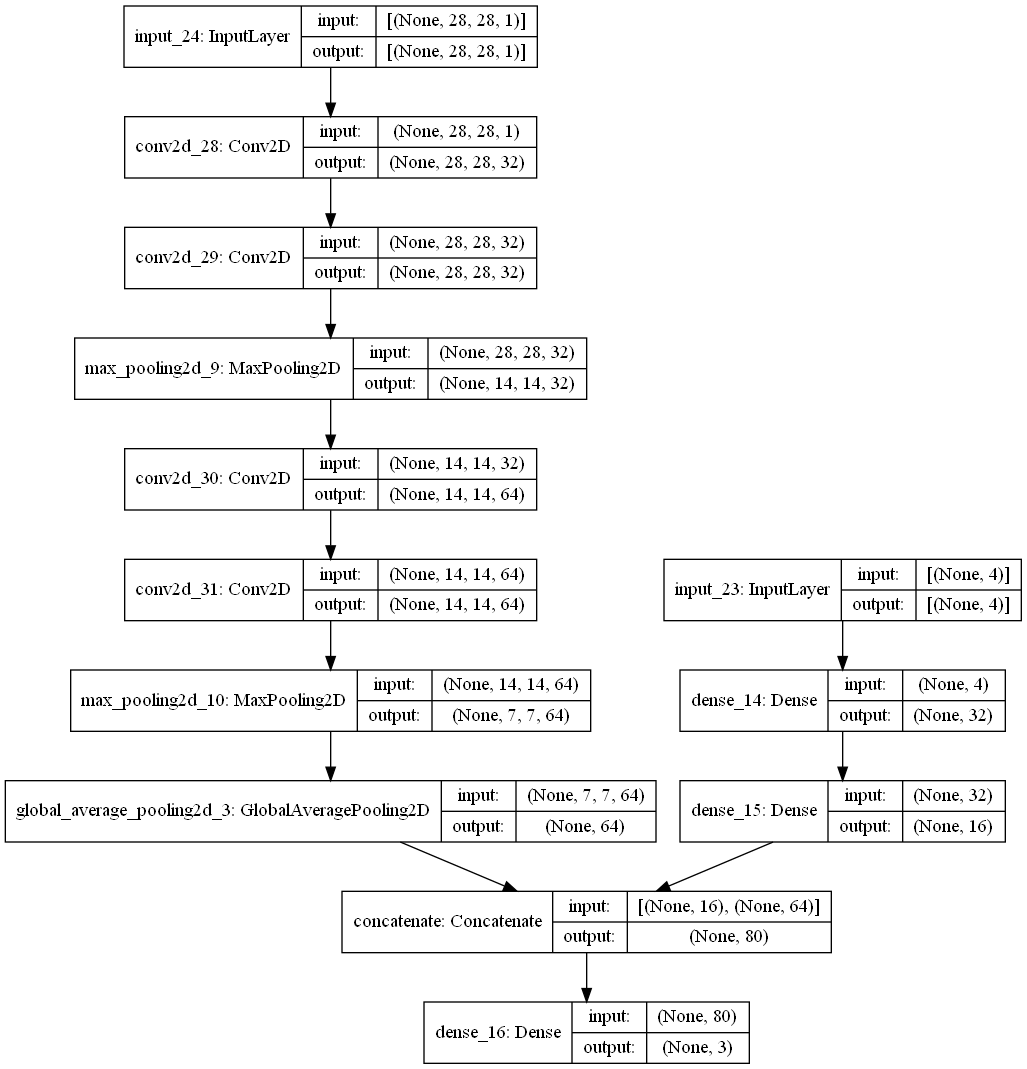

In [62]:
keras.utils.plot_model(model, show_shapes=True)

In [63]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [65]:
tf.data.Dataset.from_tensor_slices(((X, X_img), y))

<TensorSliceDataset shapes: (((4,), (28, 28)), ()), types: ((tf.float64, tf.uint8), tf.int32)>